# **Plotting Skin Friction *'C<sub>f</sub>'* for Finer Mesh (without Wall Functions)**

This notebook explains how to plot skin friction *C<sub>f</sub>* for finer mesh (double number of cells along with x-direction) for two turbulent models ('*kOmegaSST*' and '*SpalartAllmaras*'). First of all, related setups are to be established as follows.

In [1]:
#!/usr/bin/env python
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# increase dpi and use latex rendering
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 160
mpl.rc('text', usetex=True)

# Set macro for paths
run = "../run/"
finerMesh = "./output/finerMesh/"
!mkdir -p output
!mkdir -p output/finerMesh

## **1. Set Related Variables in Accordance with the Case Data**

In [2]:
UInf = 69.4
nuInf = 1.388e-05
model = "kOmegaSST"
model_sa = "SpalartAllmaras"
yp = ['0.05']
res_list = ['1e-5']

## **2. Load Data**

### 2-1. Original Case

In [3]:
tauw_path = [run + 'turbulentFlatPlate_noWallFunc/yplus_{}/tauw_{}_{}_{}.csv'.format(yp[j], model, yp[j], res_list[i]) for j in range(len(yp)) for i in range(len(res_list))]
tauw_data = [pd.read_csv(tauw_path[i + len(res_list)*j], delim_whitespace=True) for j in range(len(yp)) for i in range(len(res_list))]

tauw_path_sa = [run + 'turbulentFlatPlate_SA_noWallFunc/yplus_{}/tauw_{}_{}_{}.csv'.format(yp[j], model_sa, yp[j], res_list[i]) for j in range(len(yp)) for i in range(len(res_list))]
tauw_data_sa = [pd.read_csv(tauw_path_sa[i + len(res_list)*j], delim_whitespace=True) for j in range(len(yp)) for i in range(len(res_list))]
tauw_data_sa[0].head()

,ccx,tau_xx,tau_yy,tau_zz
0,0.000486,-48.3374,-0.943654,0
1,0.001458,-21.1201,-0.004816,0
2,0.002433,-16.4140,-0.000939,0
3,0.003410,-14.7323,-0.000377,0
4,0.004390,-13.8445,-0.000209,0


### 2-2. Finer Mesh Case

In [4]:
tauw_path_fm = [run + 'turbulentFlatPlate_noWallFunc_finerMesh_kOmegaSST/yplus_{}/tauw_{}_{}_{}.csv'.format(yp[j], model, yp[j], res_list[i]) for j in range(len(yp)) for i in range(len(res_list))]
tauw_data_fm = [pd.read_csv(tauw_path_fm[i + len(res_list)*j], delim_whitespace=True) for j in range(len(yp)) for i in range(len(res_list))]

tauw_path_fm_sa = [run + 'turbulentFlatPlate_noWallFunc_finerMesh_SA/yplus_{}/tauw_{}_{}_{}.csv'.format(yp[j], model_sa, yp[j], res_list[i]) for j in range(len(yp)) for i in range(len(res_list))]
tauw_data_fm_sa = [pd.read_csv(tauw_path_fm_sa[i + len(res_list)*j], delim_whitespace=True) for j in range(len(yp)) for i in range(len(res_list))]
tauw_data_fm_sa[0].head()

,ccx,tau_xx,tau_yy,tau_zz
0,0.000243,-67.7641,-1.877310,0
1,0.000729,-29.0583,-0.014062,0
2,0.001215,-21.5878,-0.003026,0
3,0.001703,-18.7589,-0.001339,0
4,0.002190,-17.0487,-0.000833,0


## **3. Calculation of *'Re<sub>x</sub>'* and *'C<sub>f</sub>'***

*'Re<sub>x</sub>'* should be calculated for x-axis, and *'C<sub>f</sub>'* is to be found for y-axis. This simulation case is incompressible, and thus only the kinematic viscosity is used. *'Re<sub>x</sub>'* needs not to be a list since the coordinates of the cell centers are the same, whereras *'C<sub>f</sub>'* is a list.

### 3-1. Original Case

In [5]:
x0 = 0
Rex = (tauw_data[0]['ccx'] - x0)*UInf/nuInf
Cf = [np.sqrt(tauw_data[i + len(res_list)*j]['tau_xx']**2 + tauw_data[i + len(res_list)*j]['tau_yy']**2 + tauw_data[i + len(res_list)*j]['tau_zz']**2)/(0.5*UInf**2) for j in range(len(yp)) for i in range(len(res_list))]

Cf_sa = [np.sqrt(tauw_data_sa[i + len(res_list)*j]['tau_xx']**2 + tauw_data_sa[i + len(res_list)*j]['tau_yy']**2 + tauw_data_sa[i + len(res_list)*j]['tau_zz']**2)/(0.5*UInf**2) for j in range(len(yp)) for i in range(len(res_list))]

### 3-2. Finer Mesh Case

In [6]:
Rex_fm = (tauw_data_fm[0]['ccx'] - x0)*UInf/nuInf
Cf_fm = [np.sqrt(tauw_data_fm[i + len(res_list)*j]['tau_xx']**2 + tauw_data_fm[i + len(res_list)*j]['tau_yy']**2 + tauw_data_fm[i + len(res_list)*j]['tau_zz']**2)/(0.5*UInf**2) for j in range(len(yp)) for i in range(len(res_list))]

Cf_fm_sa = [np.sqrt(tauw_data_fm_sa[i + len(res_list)*j]['tau_xx']**2 + tauw_data_fm_sa[i + len(res_list)*j]['tau_yy']**2 + tauw_data_fm_sa[i + len(res_list)*j]['tau_zz']**2)/(0.5*UInf**2) for j in range(len(yp)) for i in range(len(res_list))]

## **4. Wieghardt's Equation**

In [7]:
wieghardt = 0.288*(np.log10(Rex))**(-2.45)

## **5. Plot Skin Friction**

Skin friction *'C<sub>f</sub>'* is plotted along with *'Re<sub>x</sub>'*.

As seen below, the skin friction is not sensitive for mesh size along with x-direction regardless of turbulence models.

### 5-1. Comparison of the Result for '*kOmegaSST*' Model

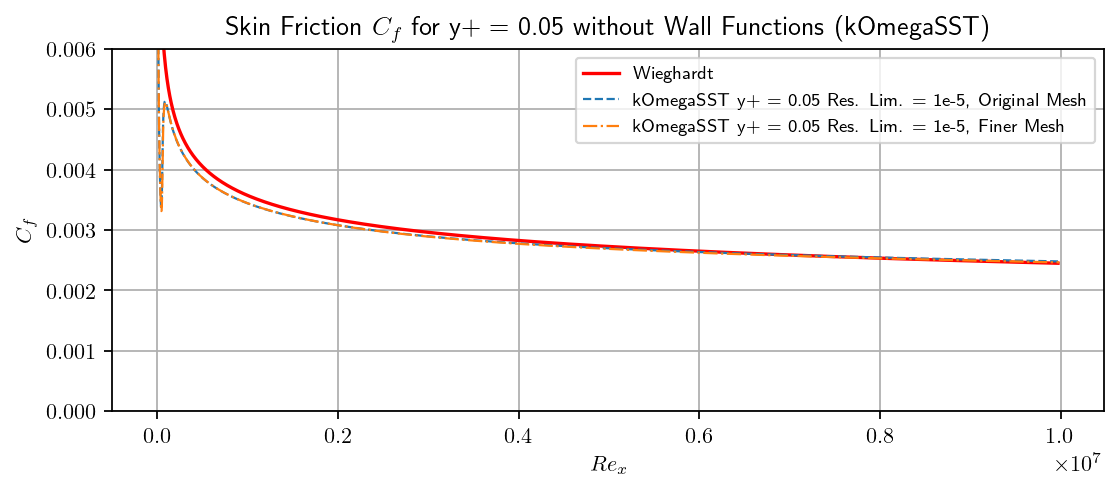

In [8]:
style = ["-", "--", "-.", ":"]
lw = 1.0
for j in range(len(yp)):
    fig, ax = plt.subplots(1, 1, figsize=(8, 3))
    plt.ylim([0, 0.006])
    plt.grid()
    ax.set_xlabel(r"$Re_x$")
    ax.set_ylabel(r"$C_f$")
    plt.title(r"Skin Friction $C_f$ for y+ = {} without Wall Functions (kOmegaSST)".format(yp[j]))
    ax.plot(Rex, wieghardt, color = "r", label = "Wieghardt")
    for i in range(len(res_list)):
        ax.plot(Rex, Cf[i + len(res_list)*j], label = "{} y+ = {} Res. Lim. = {}, Original Mesh".format(model, yp[j], res_list[i]), ls = style[1], c = "C{:d}".format(0), lw = lw)
        ax.plot(Rex_fm, Cf_fm[i + len(res_list)*j], label = "{} y+ = {} Res. Lim. = {}, Finer Mesh".format(model, yp[j], res_list[i]), ls = style[2], c = "C{:d}".format(1), lw = lw)
        ax.legend(fontsize = 8)
    plt.savefig(finerMesh + "tauw_yp{}_{}_finerMesh.pdf".format(yp[j], model, yp[j]), bbox_inches="tight")

### 5-2. Comparison of the Result for '*SpalartAllmaras*' Model

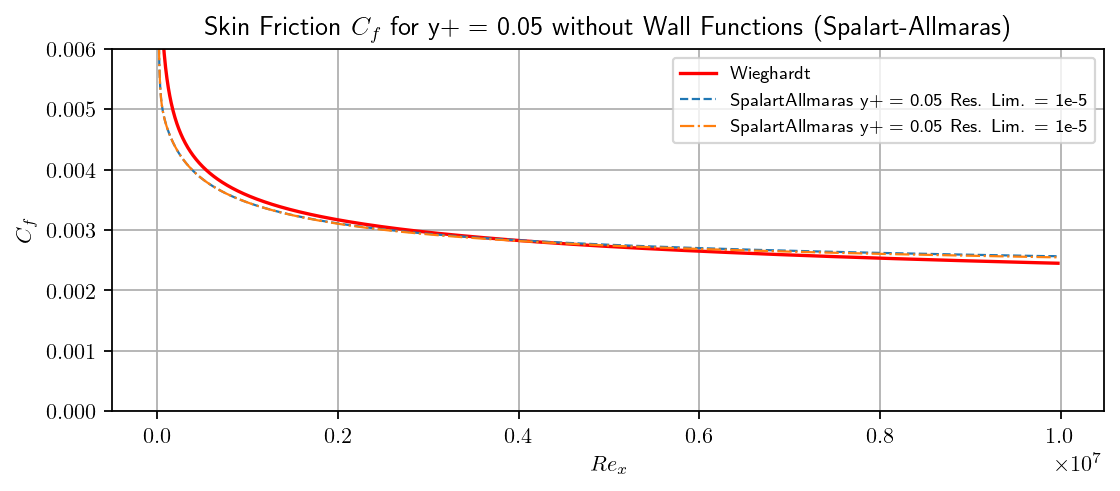

In [9]:
style2 = ["-", "--", "-.", ":"]
lw2 = 1.0
for j in range(len(yp)):
    fig2, ax2 = plt.subplots(1, 1, figsize=(8, 3))
    plt.ylim([0, 0.006])
    plt.grid()
    ax2.set_xlabel(r"$Re_x$")
    ax2.set_ylabel(r"$C_f$")
    plt.title(r"Skin Friction $C_f$ for y+ = {} without Wall Functions (Spalart-Allmaras)".format(yp[j]))
    ax2.plot(Rex, wieghardt, color = "r", label = "Wieghardt")
    for i in range(len(res_list)):
        ax2.plot(Rex, Cf_sa[i + len(res_list)*j], label = "{} y+ = {} Res. Lim. = {}".format(model_sa, yp[j], res_list[i]), ls = style2[1], c = "C{:d}".format(0), lw = lw2)
        ax2.plot(Rex_fm, Cf_fm_sa[i + len(res_list)*j], label = "{} y+ = {} Res. Lim. = {}".format(model_sa, yp[j], res_list[i]), ls = style2[2], c = "C{:d}".format(1), lw = lw2)
        ax2.legend(fontsize = 8)
    plt.savefig(finerMesh + "tauw_yp{}_{}_finerMesh.pdf".format(yp[j], model_sa, yp[j]), bbox_inches="tight")